In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle

nx, ny = 64, 64


def draw(E, artists, start_points):
    # Grid of x, y points
    x = np.linspace(-2, 2, nx)
    y = np.linspace(-2, 2, ny)
    X, Y = np.meshgrid(x, y)

    # Electric field vector, E=(Ex, Ey), as separate components
    Ex, Ey, Phi = E(X, Y)

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    ax.streamplot(x, y, Ex, Ey, linewidth=1, cmap=plt.cm.gist_yarg,
                  density=0.5, arrowstyle='->', arrowsize=0.7, broken_streamlines=False, start_points=start_points)
    ax.contour(x, y, -Phi, 20, cmap=plt.cm.seismic)

    for artist in artists:
        ax.add_artist(artist)

    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_aspect('equal')
    plt.show()


# Add filled circles for the charges themselves
charge_colors = {True: '#aa0000', False: '#0000aa'}

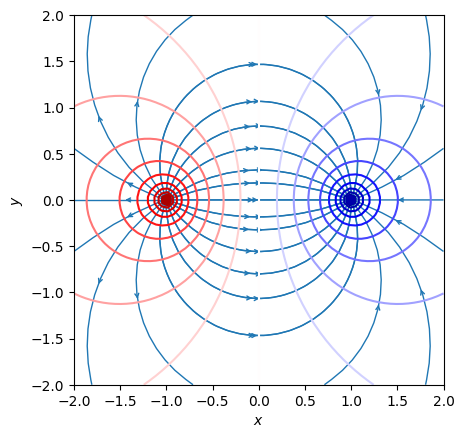

In [24]:
nq = 2**int(1)
charges_q = []
charges_pos = []
artists = []
start_points = []
for i in range(nq):
    q = i % 2 * 2 - 1
    charges_q.append(q)
    pos = (np.cos(2*np.pi*i/nq), np.sin(2*np.pi*i/nq))
    charges_pos.append(pos)
    artists.append(Circle(pos, 0.05, color=charge_colors[q > 0], zorder=100))
    NRR = 20
    for i in range(NRR):
        rad = i / NRR * 2 * np.pi
        start_points.append((pos[0] + 0.1 * np.cos(rad), pos[1] + 0.1 * np.sin(rad)))


def E0(q, r0, x, y):
    """Return the electric field vector E=(Ex,Ey) due to charge q at r0."""
    r = np.hypot(x-r0[0], y-r0[1])
    den = r**2
    return q * (x - r0[0]) / den, q * (y - r0[1]) / den, q * np.log(r)


def E1(x, y):
    Ex, Ey, Phi = np.zeros((ny, nx)), np.zeros((ny, nx)), np.zeros((ny, nx))
    for (q, pos) in zip(charges_q, charges_pos):
        ex, ey, phi = E0(q, pos, x, y)
        Ex += ex
        Ey += ey
        Phi += phi
    return Ex, Ey, Phi


draw(E1, artists, start_points)

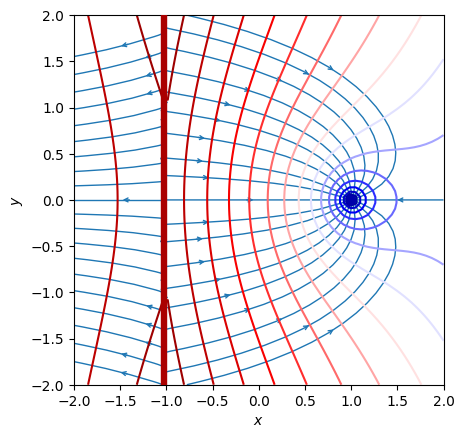

In [25]:
def E2(x, y):
    Ex, Ey, Phi = np.zeros((ny, nx)), np.zeros((ny, nx)), np.zeros((ny, nx))
    
    # Line
    r = np.abs(x + 1)
    Ex += (x + 1) / r # 1 or -1
    Ey += 0
    Phi += r

    # Point
    r = np.hypot(x-1, y)
    den = r**2
    Ex -= (x - 1) / den
    Ey -=  y / den
    Phi -= np.log(r)

    return Ex, Ey, Phi

artists = [
    Rectangle((-1.06, -5), 0.06, 10, color=charge_colors[True], zorder=100),
    Circle((1, 0), 0.05, color=charge_colors[False], zorder=100),
]

start_points = []
for i in range(20):
    start_points.append((-1.04, i / 5 - 2))

NRR = 20
for i in range(NRR):
    rad = i / NRR * 2 * np.pi
    start_points.append((1 + 0.1 * np.cos(rad), 0.1 * np.sin(rad)))

draw(E2, artists, start_points)

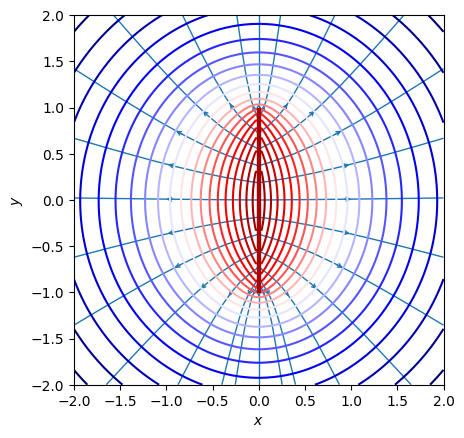

In [33]:
PNTS = 100

nq = 2**int(1)
charges_pos = []
start_points = []
for i in range(PNTS):
    pos = (0, -1 + 2 * i / PNTS)
    charges_pos.append(pos)

for i in range(10):
    pos = (0, -1 + 2 * i / 10)
    start_points.append((pos[0] - 0.1, pos[1]))
    start_points.append((pos[0] + 0.1, pos[1]))

for i in [-50, 0, 50]:
    dx = 0.1 * np.sin(i * np.pi / 180)
    dy = 0.1 * np.cos(i * np.pi / 180)
    start_points.append((0+dx, 1+dy))
    start_points.append((0+dx, -1-dy))


def E0(r0, x, y):
    r = np.hypot(x-r0[0], y-r0[1])
    den = r**2
    return (x - r0[0]) / den, (y - r0[1]) / den, np.log(r)


def E1(x, y):
    Ex, Ey, Phi = np.zeros((ny, nx)), np.zeros((ny, nx)), np.zeros((ny, nx))
    for pos in charges_pos:
        ex, ey, phi = E0(pos, x, y)
        Ex += ex
        Ey += ey
        Phi += phi
    return Ex, Ey, Phi


artists = [
    Rectangle((-0.02, -1), 0.03, 2, color=charge_colors[True], zorder=100),
]

draw(E1, artists, start_points)

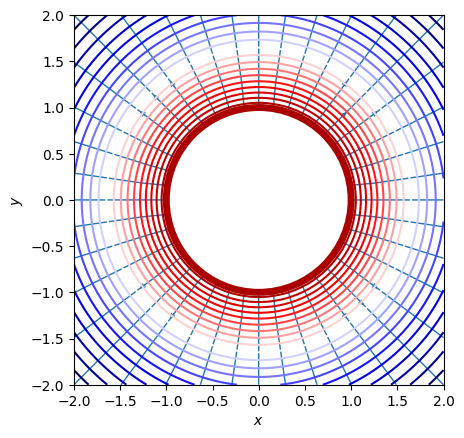

In [27]:
PNTS = 100
charges_pos = []
for i in range(PNTS):
    dx = np.sin(i * 2 * np.pi / PNTS)
    dy = np.cos(i * 2 * np.pi / PNTS)
    charges_pos.append((dx, dy))

SPNTS = 40
start_points = []
for i in range(SPNTS):
    dx = 1.01 * np.sin(i * 2 * np.pi / SPNTS)
    dy = 1.01 * np.cos(i * 2 * np.pi / SPNTS)
    start_points.append((dx, dy))

def E0(r0, x, y):
    r = np.hypot(x-r0[0], y-r0[1])
    den = r**2
    return (x - r0[0]) / den, (y - r0[1]) / den, np.log(r)

def E1(x, y):
    Ex, Ey, Phi = np.zeros((ny, nx)), np.zeros((ny, nx)), np.zeros((ny, nx))
    for pos in charges_pos:
        ex, ey, phi = E0(pos, x, y)
        Ex += ex
        Ey += ey
        Phi += phi
    return Ex, Ey, Phi

artists = [
    Circle((0, 0), 1, color='#ffffff', zorder=99),
    Circle((0, 0), 1, color=charge_colors[True], fill=False, lw=5, zorder=100),
]

draw(E1, artists, start_points)

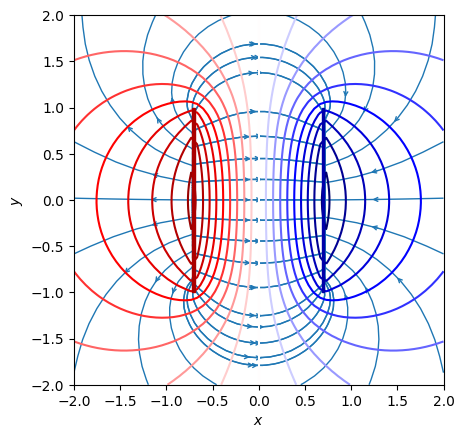

In [41]:
PNTS = 100
DC = 0.7

nq = 2**int(1)
charges_pos = []
charges_q = []
start_points = []
for i in range(PNTS):
    pos = (-DC, -1 + 2 * i / PNTS)
    charges_pos.append(pos)
    charges_q.append(1)
    pos = (DC, -1 + 2 * i / PNTS)
    charges_pos.append(pos)
    charges_q.append(-1)

for i in range(10):
    pos = (-DC, -1 + 2 * i / 10)
    start_points.append((pos[0] - 0.1, pos[1]))
    start_points.append((pos[0] + 0.1, pos[1]))
    pos = (DC, -1 + 2 * i / 10)
    start_points.append((pos[0] - 0.1, pos[1]))
    start_points.append((pos[0] + 0.1, pos[1]))

for i in [-50, 0, 50]:
    dx = 0.1 * np.sin(i * np.pi / 180)
    dy = 0.1 * np.cos(i * np.pi / 180)
    start_points.append((-DC+dx, 1+dy))
    start_points.append((-DC+dx, -1-dy))
    start_points.append((DC+dx, 1+dy))
    start_points.append((DC+dx, -1-dy))


def E0(q, r0, x, y):
    r = np.hypot(x-r0[0], y-r0[1])
    den = r**2
    return q * (x - r0[0]) / den, q * (y - r0[1]) / den, q * np.log(r)


def E1(x, y):
    Ex, Ey, Phi = np.zeros((ny, nx)), np.zeros((ny, nx)), np.zeros((ny, nx))
    for pos, q in zip(charges_pos, charges_q):
        ex, ey, phi = E0(q, pos, x, y)
        Ex += ex
        Ey += ey
        Phi += phi
    return Ex, Ey, Phi


artists = [
    Rectangle((-DC-0.02, -1), 0.03, 2, color=charge_colors[True], zorder=100),
    Rectangle((DC-0.02, -1), 0.03, 2, color=charge_colors[False], zorder=100),
]

draw(E1, artists, start_points)